In [405]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import seaborn as sns
%matplotlib widget
from ipywidgets import widgets

In [406]:
path1 = "C://Users//Lawrence//Documents/ActFinalVals072123//"
path2 = "C://Users//Lawrence//Documents/ActFinalVals072123//ValValid//"
if os.getcwd() != path1:
    os.chdir(path1)
    print("changed path to: " + os.getcwd())
else:
    print(os.getcwd())

changed path to: C:\Users\Lawrence\Documents\ActFinalVals072123


In [411]:
filelist = []
i = 0
for file in os.listdir():
    filelist.append(file)
    print(i, file)
    i+=1

df = pd.read_csv(filelist[14])
df1 = pd.read_csv(filelist[14])


0 ActValid
1 logs_20230721_165205_A08008V00115.csv
2 logs_20230721_175035_A08009V00120.csv
3 logs_20230721_183212_A08011V00124.csv
4 logs_20230721_191856_A08012V00127.csv
5 logs_20230721_202250_A08013V00131.csv
6 logs_20230721_210524_A08015V00114.csv
7 logs_20230721_220737_A08017V00125.csv
8 logs_20230721_225240_A08010V00171.csv
9 logs_20230721_234424_A08014V00172.csv
10 logs_20230722_000928_A08018V00173.csv
11 logs_20230722_002822_A08019V00118.csv
12 logs_20230722_004108_A08019V00118.csv
13 logs_20230722_004557_A08020V00119.csv
14 logs_20230722_010421_A08016V00126.csv
15 ValValid


In [412]:
df.head()

,pulse_idx,target_adc,start_shaft_adc,timestamp_abs_ms,timestamp_rel_ms,blade_position,blade_position_deg,blade_target_deg,blade_open_isense,blade_close_isense,thold_dmd_ms,thold_dmdbias_pos,thold_dmdbias_neg,cmd
0,0,2312,784,808,-192,781,2.5829,29.9878,0,0,32.0,-20.0,-30.0,chan_name=Blade1Open start_delay_duration_100...
1,0,2312,784,813,-187,782,2.6008,29.9878,0,0,32.0,-20.0,-30.0,NaN
2,0,2312,784,818,-182,780,2.5650,29.9878,0,0,32.0,-20.0,-30.0,NaN
3,0,2312,784,823,-177,780,2.5650,29.9878,0,0,32.0,-20.0,-30.0,NaN
4,0,2312,784,828,-172,783,2.6187,29.9878,0,0,32.0,-20.0,-30.0,NaN


In [413]:
def passfail(df):
    x = range(0,60)
    p = 0.2 #percentage of last data to take
    count = 0
    valid = 0
    for i in range(commands[len(commands)-int(round(len(commands)*0.1))], len(df['blade_close_isense'])):
        if (df['blade_close_isense'][i] > 500) and (df['blade_close_isense'][i-1] < 500):
            if len(df['blade_close_isense'][i-15:i+45]) != len(x):
                continue
            if np.average(df['blade_position_deg'][i-10:i]) > 32.5 or np.average(df['blade_position_deg'][i-10:i]) < 27.5 or np.average(df['blade_position_deg'][i+20:i+30]) > 7 or np.average(df['blade_position_deg'][i+20:i+30]) < 2:
                count+=1
            else:
                count +=1
                valid +=1
    
    if valid / count > 0.99:
        return('pass')
    elif valid / count > 0.80:
        return('conditional pass')
    else:
        return('fail')

In [414]:
print(os.getcwd())
filelistval = glob.glob("*.csv")
for i in range(len(filelistval)):
    df = pd.read_csv(filelistval[i])
    print('RUN #' + str(i+1) + ' ' + passfail(df))

C:\Users\Lawrence\Documents\ActFinalVals072123
RUN #1 pass
RUN #2 pass
RUN #3 pass
RUN #4 pass
RUN #5 pass
RUN #6 pass
RUN #7 pass
RUN #8 pass
RUN #9 pass
RUN #10 pass
RUN #11 fail
RUN #12 conditional pass
RUN #13 pass
RUN #14 pass


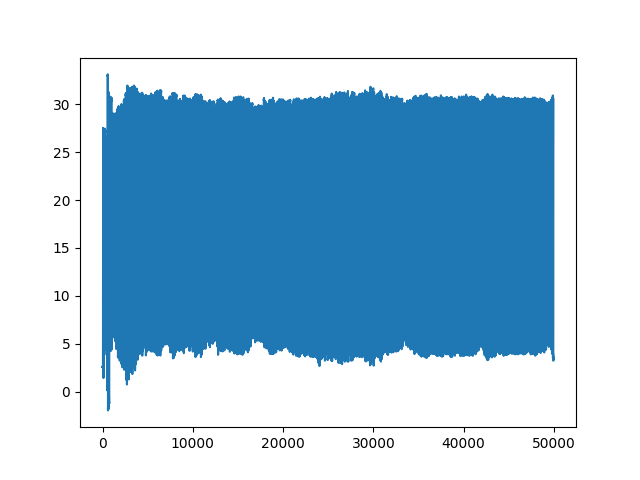

In [415]:
fig, ax = plt.subplots()

ax.plot(df["blade_position_deg"])

In [416]:
commands = df[~df['cmd'].isna()].index.values
commands[-1]

49901

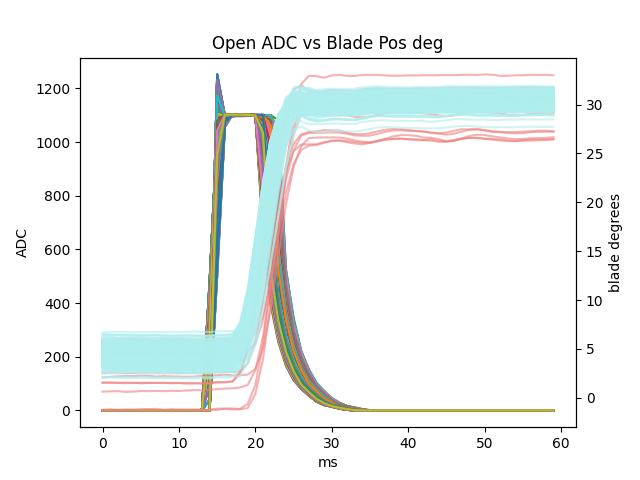

Out of 500 actuations, 489 valid : 97.8% Validity


In [417]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
x = range(0,60)
v = 0
c = 0
postime = []
for i in range(1, len(df['blade_open_isense'])):
    if (df['blade_open_isense'][i] > 500) and (df['blade_open_isense'][i-1] < 500):
        #print(i)
        c += 1
        if len(df['blade_open_isense'][i-15:i+45]) != len(x):
            #print(len(df['blade_open_isense'][i-15:i+45]))
            continue
        ax1.plot(x, df['blade_open_isense'][i-15:i+45])
        if np.average(df['blade_position_deg'][i-10:i]) > 7 or np.average(df['blade_position_deg'][i-10:i]) < 2 or np.average(df['blade_position_deg'][i+20:i+30]) > 32.5 or np.average(df['blade_position_deg'][i+20:i+30]) < 27.5:
            ax2.plot(x, df['blade_position_deg'][i-15:i+45], 'lightcoral', alpha = 0.6)
            postime.append(np.average(df['blade_position_deg'][i+20:i+30]))
        else:
            ax2.plot(x, df['blade_position_deg'][i-15:i+45], 'paleturquoise', alpha = 0.6)
            v +=1
            postime.append(np.average(df['blade_position_deg'][i+20:i+30]))

        
ax1.set_ylabel('ADC')
ax2.set_ylabel('blade degrees')
ax1.set_xlabel('ms')
plt.title('Open ADC vs Blade Pos deg')
plt.show()
print("Out of " + str(c) + " actuations, " + str(v) + " valid : " + str(v/c*100) + "% Validity")

49


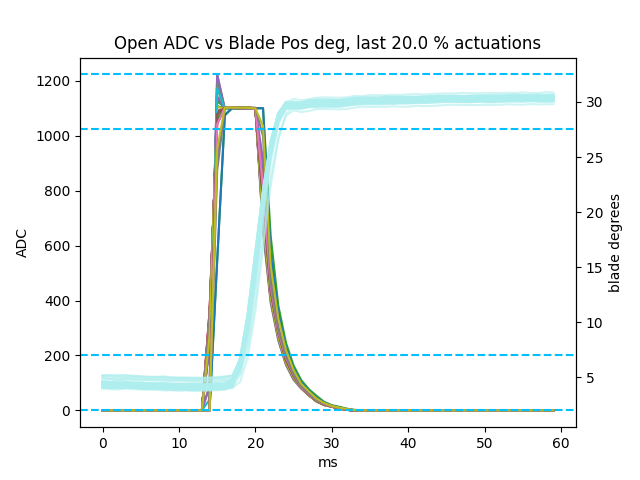

1.0
PASS


In [418]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
x = range(0,60)
count = 0
p = 0.2 #percentage of last data to take
valid = 0
for i in range(commands[len(commands)-int(round(len(commands)*0.1))], len(df['blade_open_isense'])):
    if (df['blade_open_isense'][i] > 500) and (df['blade_open_isense'][i-1] < 500):
        if len(df['blade_open_isense'][i-15:i+45]) != len(x):
            continue
        ax1.plot(x, df['blade_open_isense'][i-15:i+45])
        if np.average(df['blade_position_deg'][i-10:i]) > 7 or np.average(df['blade_position_deg'][i-10:i]) < 2 or np.average(df['blade_position_deg'][i+20:i+30]) > 32.5 or np.average(df['blade_position_deg'][i+20:i+30]) < 27.5:
            ax2.plot(x, df['blade_position_deg'][i-15:i+45], 'lightcoral', alpha = 0.6)
            count +=1
        else:
            ax2.plot(x, df['blade_position_deg'][i-15:i+45], 'paleturquoise', alpha = 0.6)
            valid +=1
            count +=1
        
ax1.set_ylabel('ADC')
ax2.set_ylabel('blade degrees')
ax1.set_xlabel('ms')
print(count)
ax2.axhline(2, c = 'deepskyblue', linestyle = 'dashed')
ax2.axhline(7, c = 'deepskyblue', linestyle = 'dashed')
ax2.axhline(27.5, c = 'deepskyblue', linestyle = 'dashed')
ax2.axhline(32.5, c = 'deepskyblue', linestyle = 'dashed')

plt.title('Open ADC vs Blade Pos deg, last ' + str(p*100) + ' % actuations')
plt.show()
print(valid / count)
if valid / count > 0.99:
    print("PASS")
elif valid / count > 0.80:
    print("CONDITIONAL PASS")
else:
    print("FAIL")



### fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
x = range(0,60)
v = 0
c = 0
for i in range(1, len(df['blade_close_isense'])):
    if (df['blade_close_isense'][i] > 500) and (df['blade_close_isense'][i-1] < 500):
        #print(i)
        c += 1
        if len(df['blade_close_isense'][i-15:i+45]) != len(x):
            #print(len(df['blade_open_isense'][i-15:i+45]))
            continue
        ax1.plot(x, df['blade_close_isense'][i-15:i+45])
        if np.average(df['blade_position_deg'][i-10:i]) > 32.5 or np.average(df['blade_position_deg'][i-10:i]) < 27.5 or np.average(df['blade_position_deg'][i+20:i+30]) > 7 or np.average(df['blade_position_deg'][i+20:i+30]) < 2:
            ax2.plot(x, df['blade_position_deg'][i-15:i+45], 'lightcoral', alpha = 0.6)
            #print(np.average(df['blade_position_deg'][i-15:i-10]))
        else:
            ax2.plot(x, df['blade_position_deg'][i-15:i+45], 'paleturquoise', alpha = 0.6)
            v +=1
            #print(np.average(df['blade_position_deg'][i-15:i-10]))
            
ax1.set_ylabel('ADC')
ax2.set_ylabel('blade degrees')
ax1.set_xlabel('ms')
plt.title('Close ADC vs Blade Pos deg')
plt.show()
print("Out of " + str(c) + " actuations, " + str(v) + " valid : " + str(v/c*100) + "% Validity")